In [5]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic')

In [6]:
tickers = {
    # 化学メーカー
    "ダイセル"          : "4202.T",
    "東レ"           : "3402.T",
    "UBE"             : "4208.T",
    "クラレ"        : "3405.T",
    "東ソー"           : "4042.T",
    "レゾナック"         : "4004.T",   # 旧 昭和電工
    "三菱ケミカル"  : "4188.T",
    "住友化学"    : "4005.T",
    "旭化成"      : "3407.T",
    "三井化学"      : "4183.T",
    "カネカ"          : "4118.T",
    "信越化学工業"    : "4063.T",

    # 日経平均（インデックス）
    "日経225"       : "^N225"
}

In [7]:
symbols = list(tickers.values())
raw = yf.download(symbols, start="2000-01-01", auto_adjust=True)["Close"]
monthly = raw.resample("M").last()

[*********************100%***********************]  13 of 13 completed
/var/folders/8b/fnjbvl914bz20c8ksp1lclvw0000gn/T/ipykernel_88704/3553795164.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = raw.resample("M").last()


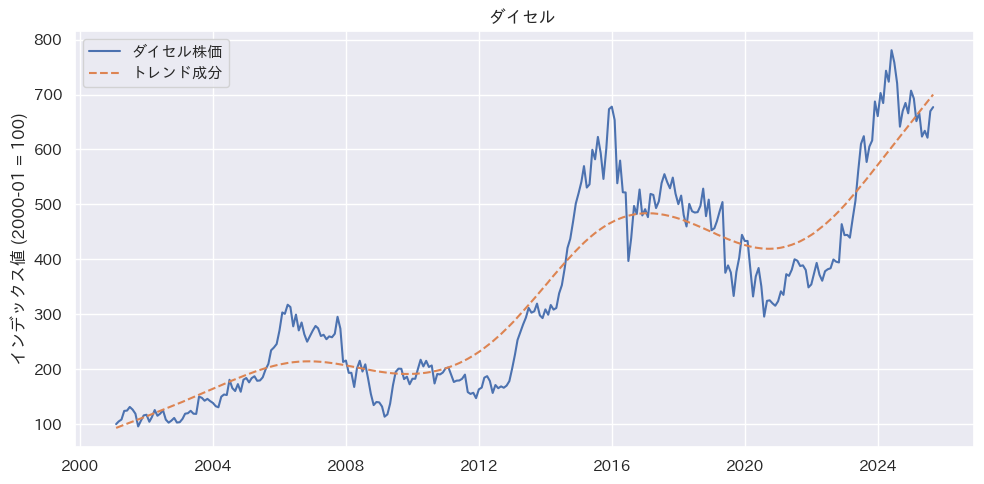

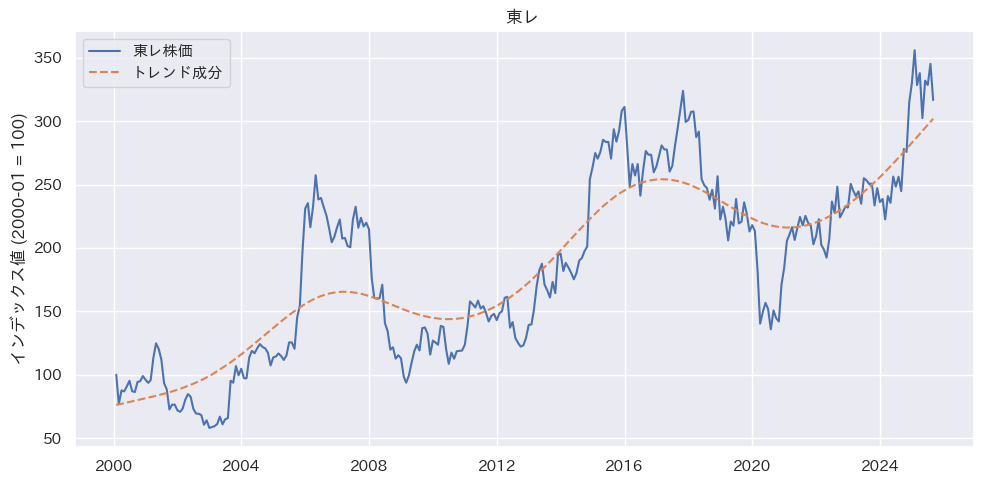

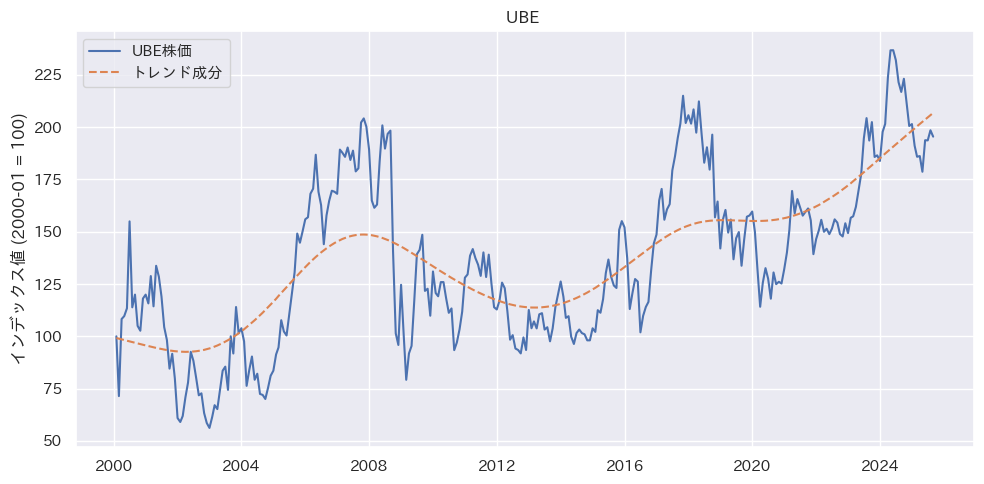

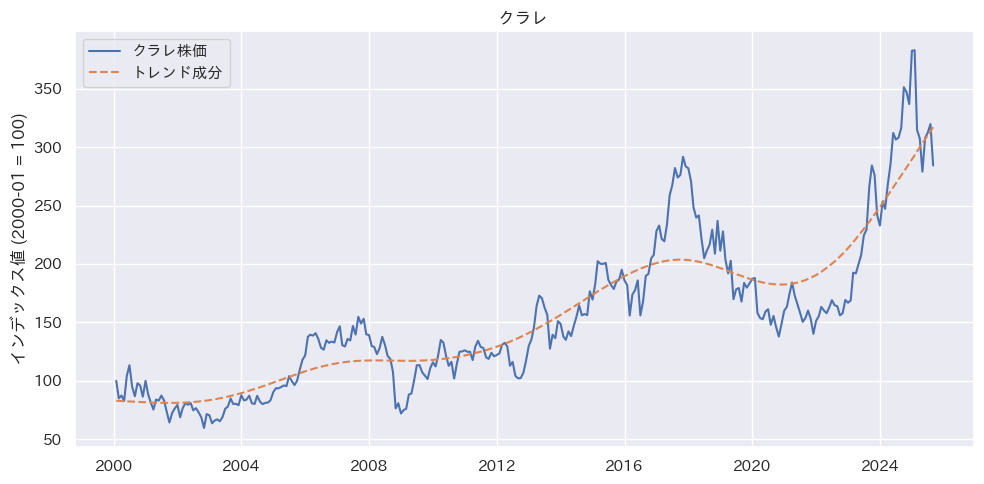

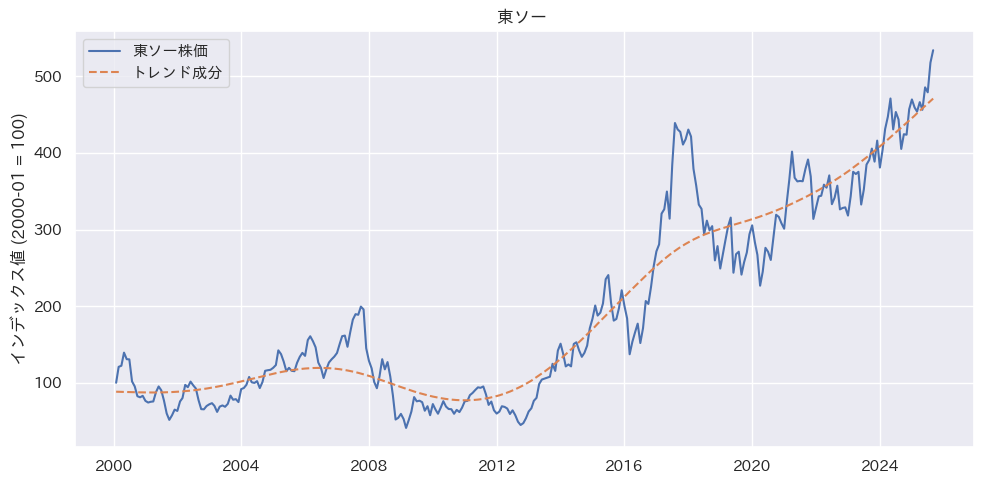

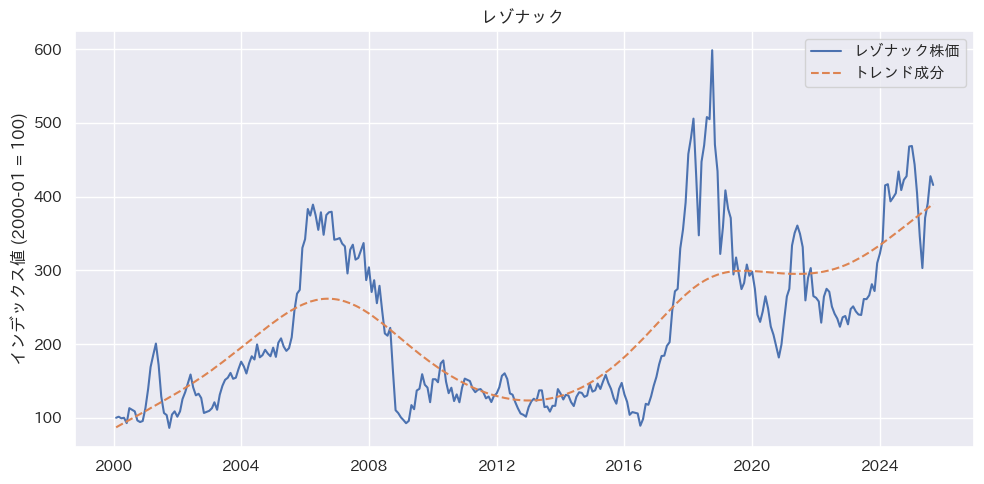

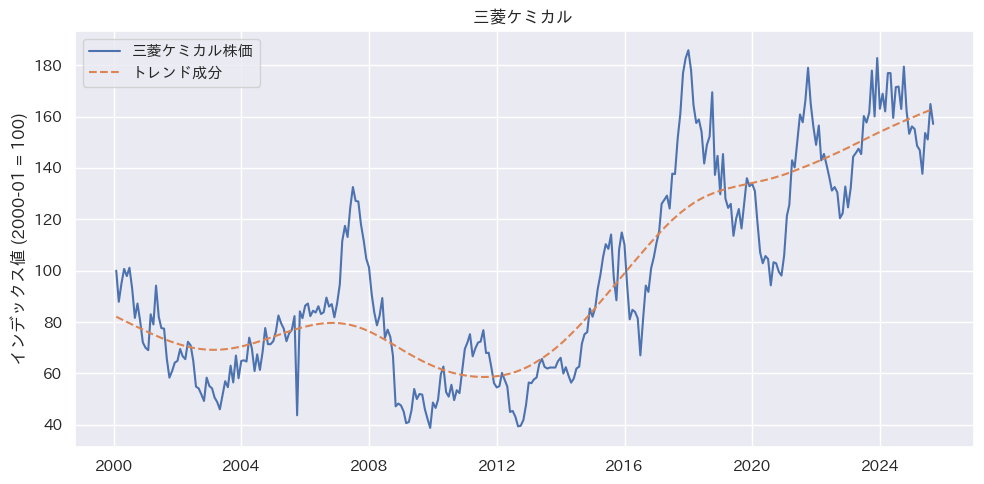

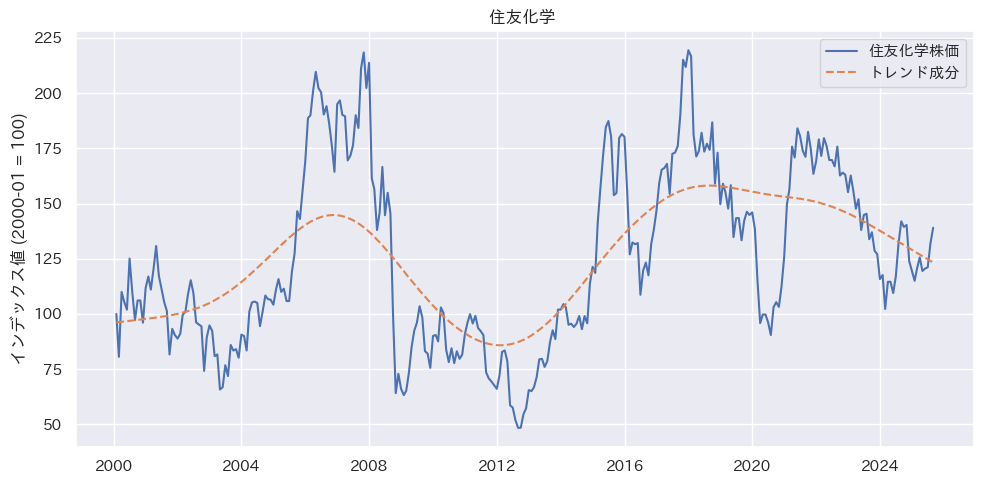

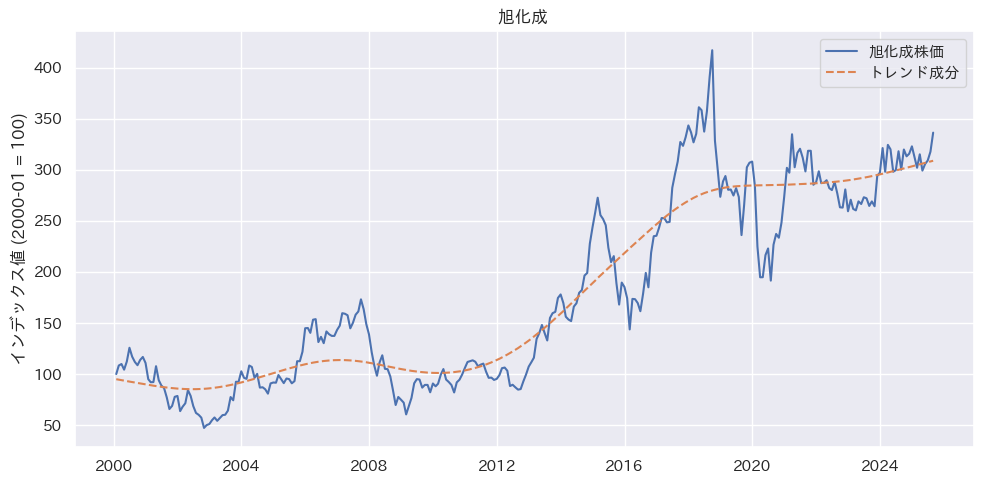

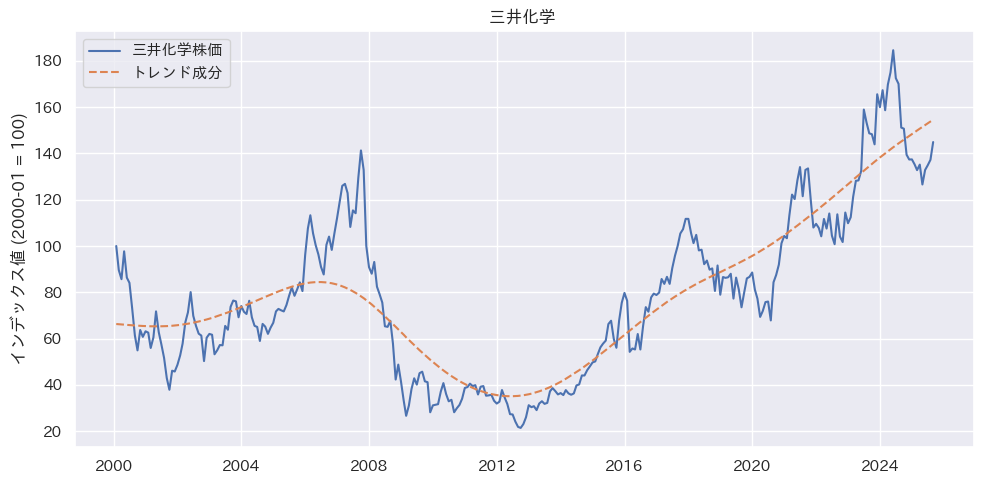

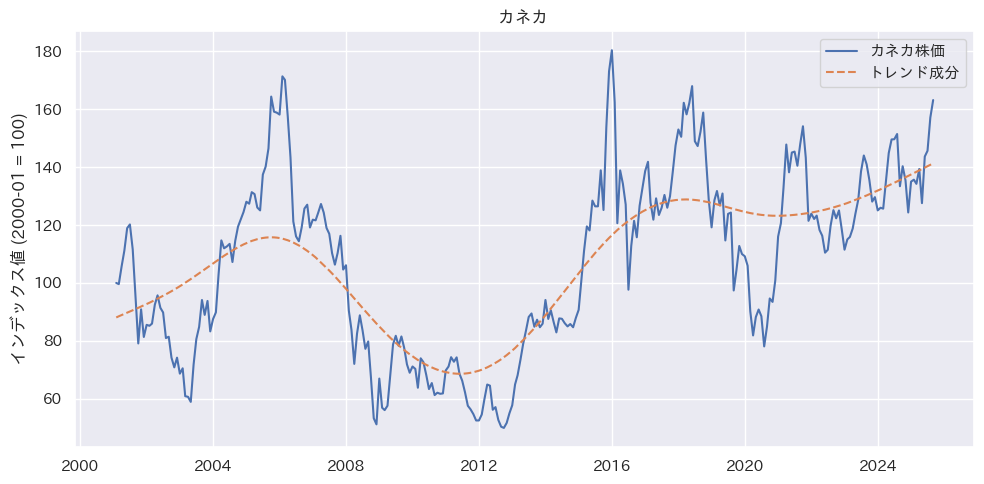

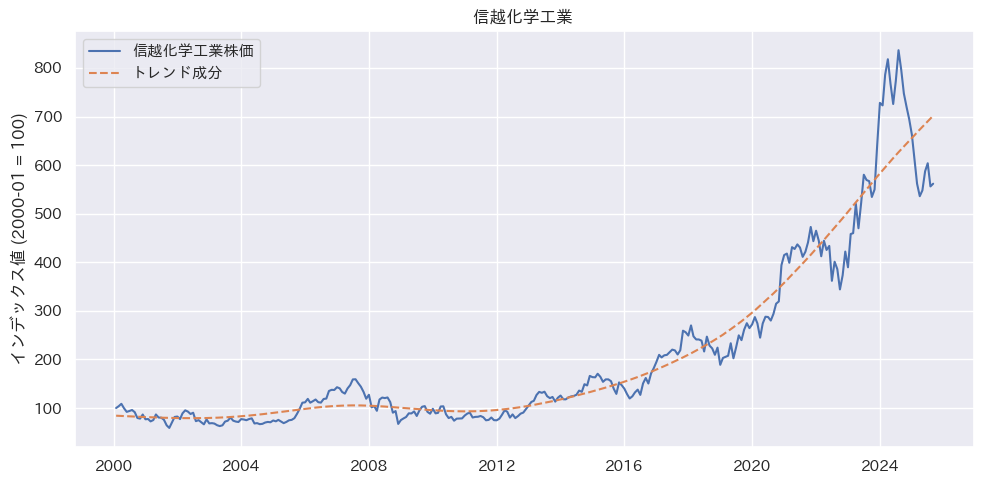

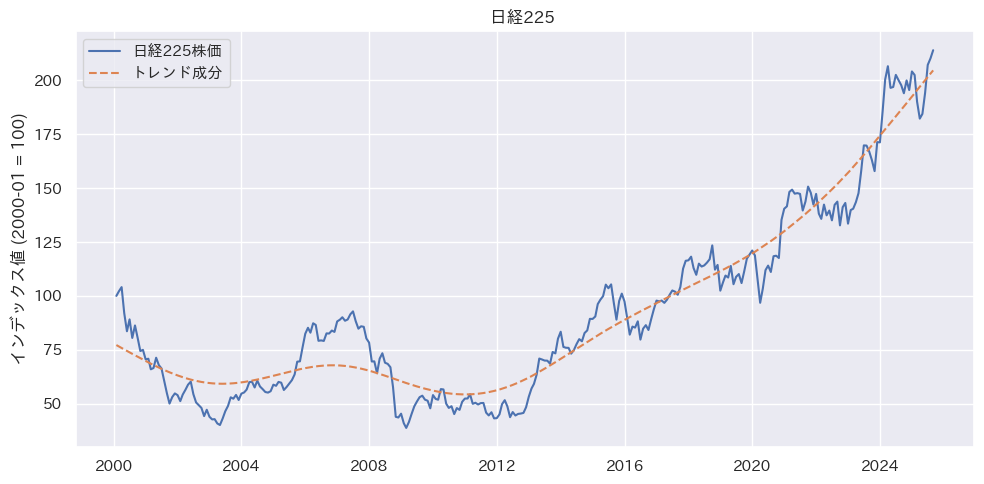

In [9]:
LAMBDA = 129_600      # HP フィルタ用 λ（=1600×(12/4)^4）

for name, code in tickers.items():
    # 4‑1. 2000年1月＝100 に正規化
    monthly_code = monthly[code].dropna()
    price_idx = monthly_code / monthly_code.iloc[0] * 100
    
    # 4‑2. HPフィルタでトレンドと循環を分解
    cycle, trend = sm.tsa.filters.hpfilter(price_idx, lamb=LAMBDA)
    
    # 4‑3. 描画
    plt.figure(figsize=(10,5))
    plt.plot(price_idx, label=f"{name}株価")
    plt.plot(trend, linestyle="--", label="トレンド成分")
    plt.title(f"{name} ")
    plt.ylabel("インデックス値 (2000‑01 = 100)")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
tickers_select = {
    "ダイセル"          : "4202.T",
    "東レ"           : "3402.T",
    "UBE"             : "4208.T",
    "クラレ"        : "3405.T",
    #"東ソー"           : "4042.T",
    "レゾナック"         : "4004.T",   # 旧 昭和電工
    #"三菱ケミカル"  : "4188.T",
    #"住友化学"    : "4005.T",
    #"旭化成"      : "3407.T",
    #"三井化学"      : "4183.T",
    "カネカ"          : "4118.T",
    #"信越化学工業"    : "4063.T",

    # 日経平均（インデックス）
    "日経225"       : "^N225"
}

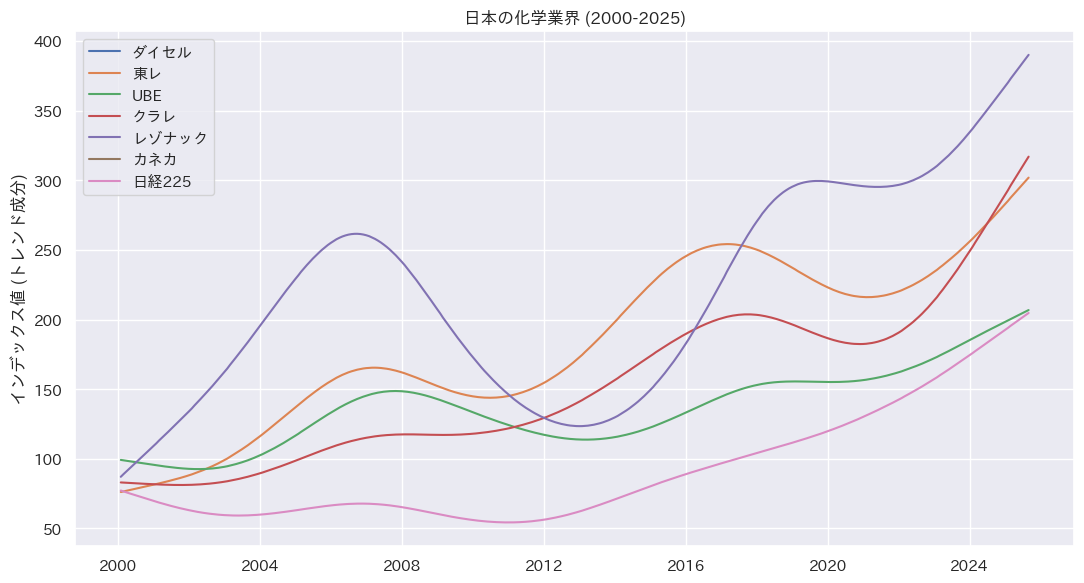

In [11]:
LAMBDA = 129_600                     # 月次データ用 HP λ
trend_df = pd.DataFrame()            # 空の器を用意

for name, code in tickers_select.items():
    price_idx = monthly[code] / monthly[code].iloc[0] * 100
    cycle, trend = sm.tsa.filters.hpfilter(price_idx, lamb=LAMBDA)
    trend_df[name] = trend           # 列として追加

# 1 枚の図に重ね描き
plt.figure(figsize=(11,6))

for col in trend_df.columns:
    plt.plot(trend_df.index, trend_df[col], label=col)

plt.title("日本の化学業界 (2000‑2025)")
plt.ylabel("インデックス値 (トレンド成分)")
plt.legend()
plt.tight_layout()
plt.show()